# Текстовое описание набора данных¶
В качестве набора данных мы будем использовать набор данных по состоянию ходьбы человека - 
https://www.kaggle.com/vmalyi/run-or-walk. 
Датасет состоит из 88588 наборов значений взятых с акселерометра и гироскопа. 
Данные собирались на устройство iPhone 5c, который был закреплен на запястье человека(левое и правое).
Информация о данных бралась каждые 10 секунд.
Задача определения активности по электронным устройствам является актуальной для легкоатлетов.

### Датасет состоит из одного файла:

row_dataset.csv - выборка со всеми данными.

Позже мы разделим данный файл на обучающую и тестовую выборки.


### Файл содержит следующие колонки:

1. date - дата в формате ГОД-МЕСЯЦ-ДЕНЬ.
1. time - время в формате ЧАСЫ:МИНУТЫ:СЕКУНДЫ:ДОЛИСЕКУНДЫ. Набор данных содержит данные с частотой измерения в 5,4 раза в секунду.
1. username - пользователь, который проводил измерение
1. wrist - запястье.
1. activity - тип активности
1. acceleration_x - значение акселерометра по оси X
1. acceleration_y - значение акселерометра по оси Y
1. acceleration_z - значение акселерометра по оси Z
1. gyro_x - значение гироскопа по оси X
1. gyro_y - значение гироскопа по оси Y
1. gyro_z - значение гироскопа по оси Z

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('data/row_dataset.csv', sep=",")

# Основные характеристики датасета

In [4]:
# Первые 5 строк датасета
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(88588, 11)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 88588


In [7]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

date - 0
time - 0
username - 0
wrist - 0
activity - 0
acceleration_x - 0
acceleration_y - 0
acceleration_z - 0
gyro_x - 0
gyro_y - 0
gyro_z - 0


In [10]:
# Основные статистические характеристки набора данных
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [11]:
# Определим уникальные значения для целевого признака
data['activity'].unique()

array([0, 1])

# Разделение данных

In [18]:
ratio_train = 0.98 # Здесь мы берем очень маленькое значение тестовых данных для быстрого анализа

def separate_data(ratio, data):
    count_train = int(data.shape[0]*ratio)
    #data[:][count_train-5:count_train+5]
    data_train = data[:][:count_train]
    data_test = data[:][count_train+1:]
    return data_train, data_test

data_train, data_test = separate_data(ratio_train, data)

data_test.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
86817,2017-7-9,20:2:14:101912021,viktor,0,1,0.7541,0.0245,-1.0089,-0.8400,2.6332,1.2286
86818,2017-7-9,20:2:14:301832973,viktor,0,1,0.8917,0.2568,-0.7409,-0.6894,0.1461,-4.0394
86819,2017-7-9,20:2:14:501981019,viktor,0,1,-0.6973,-0.7831,-0.1123,2.0450,-1.5263,-1.6423
86820,2017-7-9,20:2:14:702419996,viktor,0,1,0.7428,-0.8717,-0.7311,-0.1606,1.3835,4.1870
86821,2017-7-9,20:2:14:901983022,viktor,0,1,0.3246,1.0058,-0.5405,-0.9666,-0.2725,0.9112


В качестве эталонной выборки, будем использовать выборку, содержащую 2 типа активности

In [22]:
data_test.shape

(1771, 11)

# Визуализация данных

## Количественные показатели значений
Рассмотрим некоторые показатели датасета для того, чтобы убедиться в его правильности. Интересующие нас показатели: запястье и вид активности

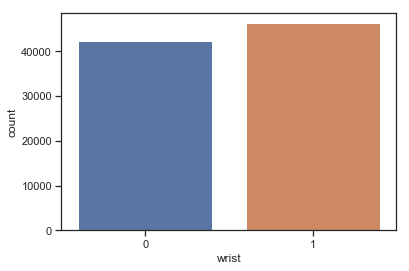

In [53]:
# Диаграмма количества уникальных значений
sns.countplot(data.wrist)

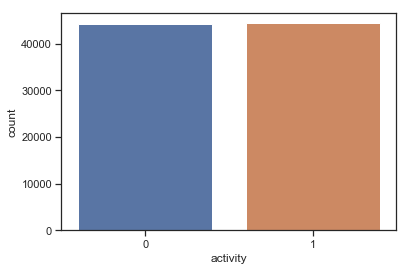

In [54]:
# Диаграмма количества уникальных значений
sns.countplot(data.activity)

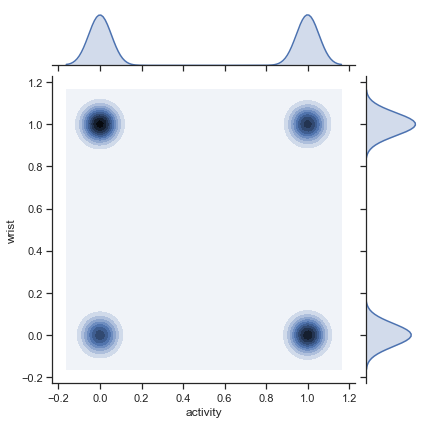

In [49]:
sns.jointplot(x='activity', y='wrist', data=data, kind="kde")

## Диаграмма рассеяния
Интереующие нас значения для данного вида графика - все значения с акселерометра и гироскопа по времени. Именно эти данные по времени нам дадут представление о поведении датчиков на разных типов активности. В качестве целевого признака будем использовать тип_активности (activity)

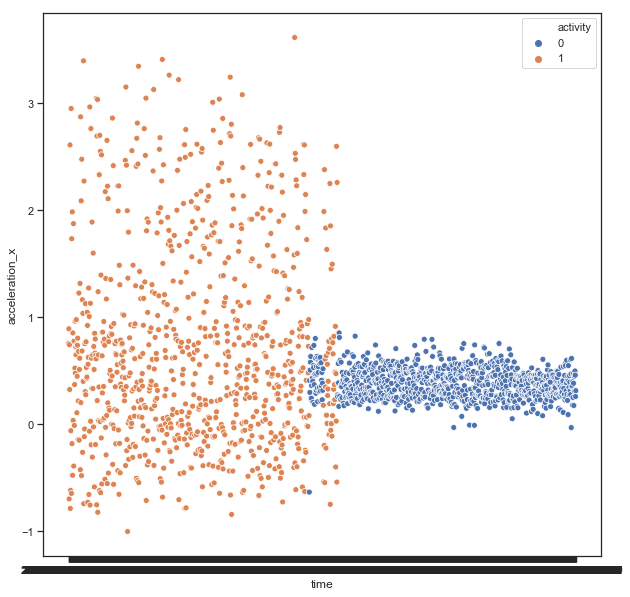

In [20]:
# Показания для acceleration_x
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_x', data=data_test, hue='activity')

Можно заметить, что значения акселеромтра по оси Х при разных видах точки на графике активности (график выше) разбросаны по-разному. Проверим это и для остальных показателей датчиков

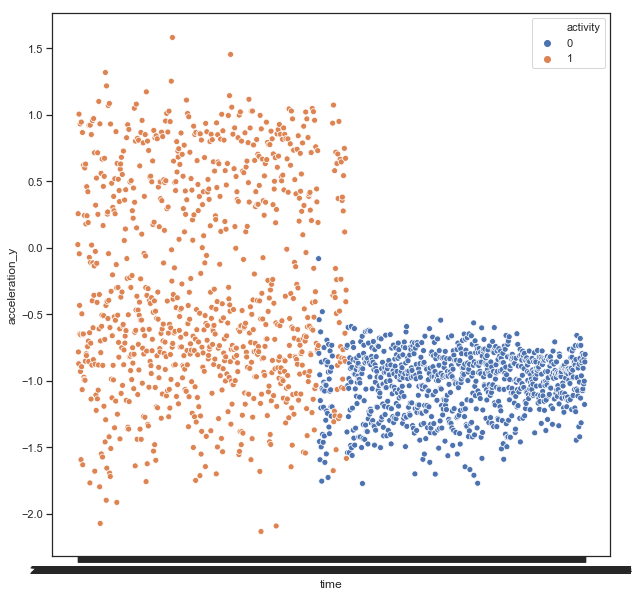

In [23]:
# Показания для acceleration_y
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_y', data=data_test, hue='activity')

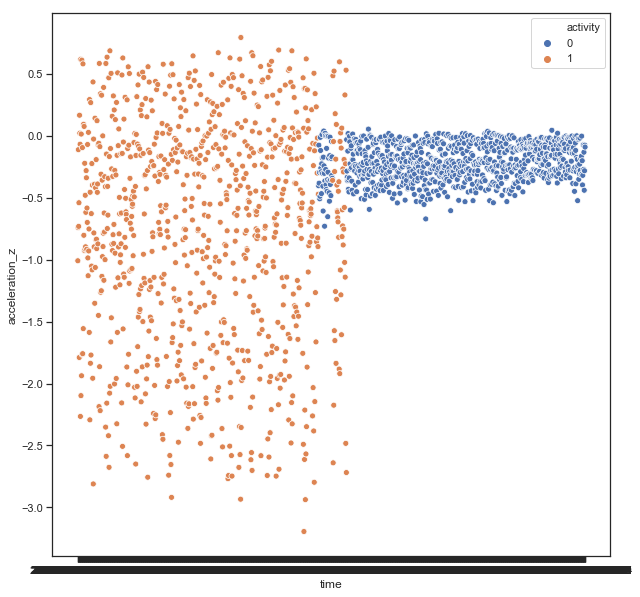

In [24]:
# Показания для acceleration_z
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='acceleration_z', data=data_test, hue='activity')

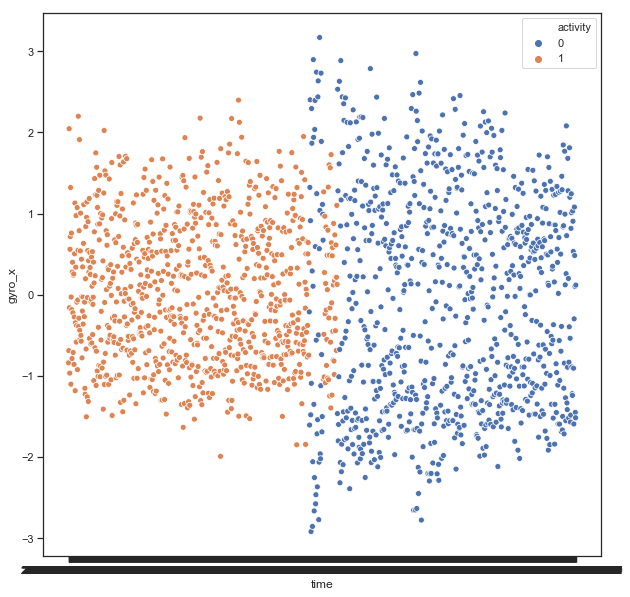

In [25]:
# Показания для gyro_x
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='gyro_x', data=data_test, hue='activity')

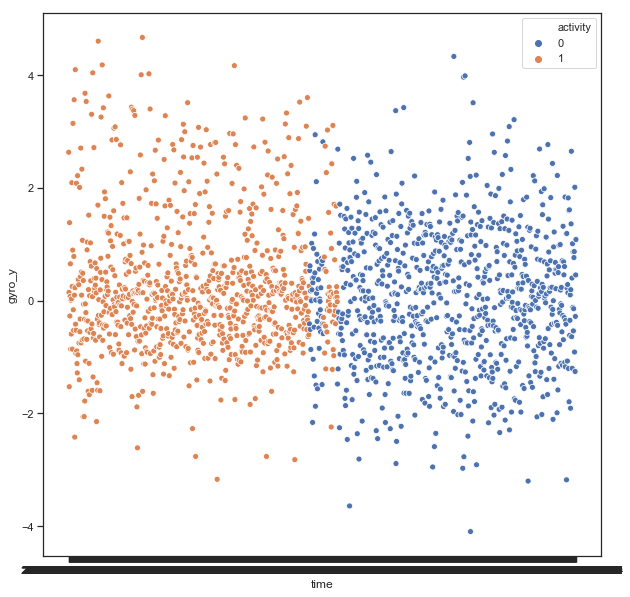

In [26]:
# Показания для gyro_y
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='gyro_y', data=data_test, hue='activity')

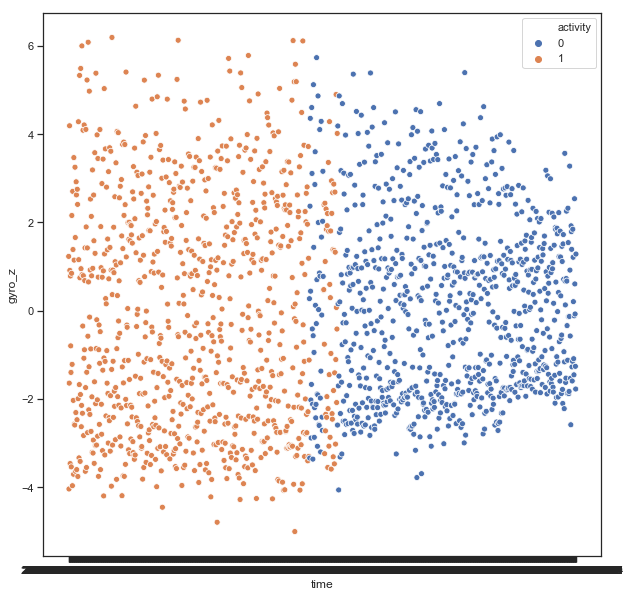

In [27]:
# Показания для gyro_z
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='time', y='gyro_z', data=data_test, hue='activity')

### Вывод
Из приведенных выше графиков визуально наиболее смысловую информацию о типе активности пользователя несут показания с акселерометра устройства. Проверим их плотность распределения.
# Гистограммы

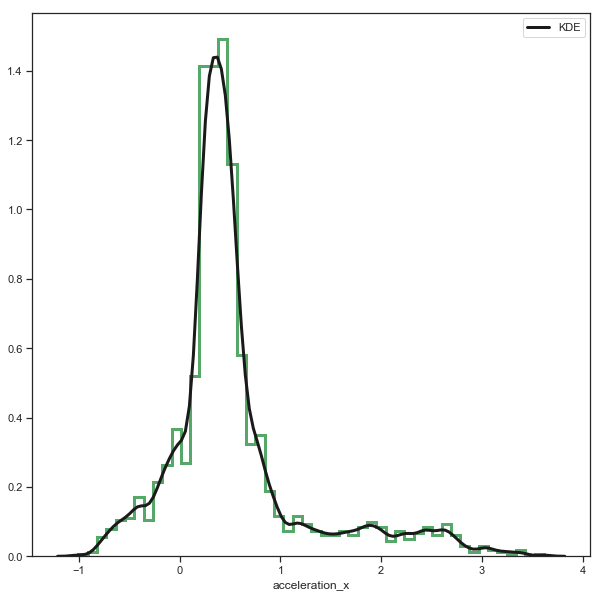

In [59]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_test['acceleration_x'], rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

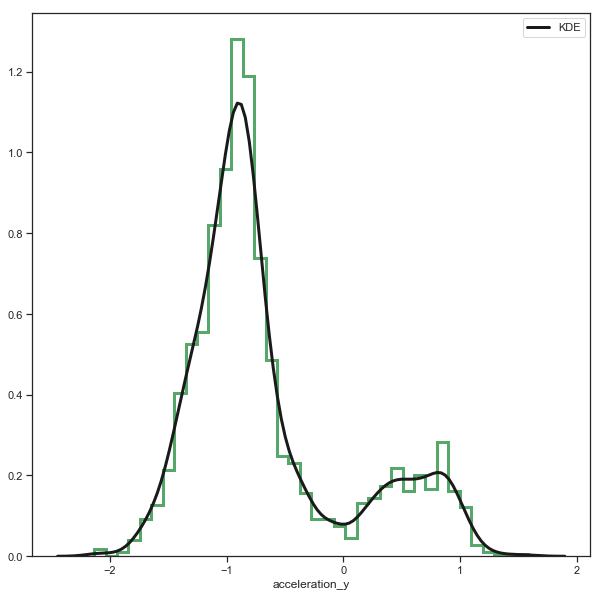

In [61]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_test['acceleration_y'],rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

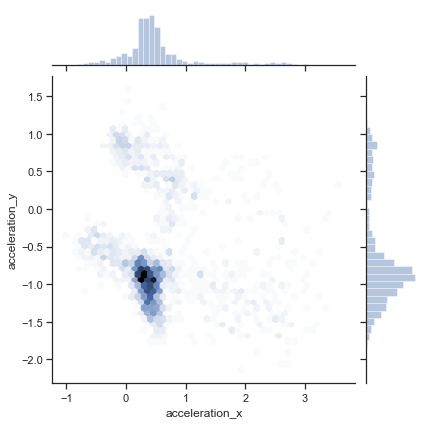

In [62]:
# Смешанная диаграмма рассеяния
sns.jointplot(x='acceleration_x', y='acceleration_y', data=data_test, kind="hex")

In [ ]:
Можно заметить, что наиболее выделенное пятно соответствует состоянию, когда ускорение по 2-м осям близко к 0. 
Это состояние присуще сразу 2-м типам активности. В качестве гипотезы примем, что для обучения модели в дальнейшем будем рассматривать именно зависимости по значениям акселерометра.

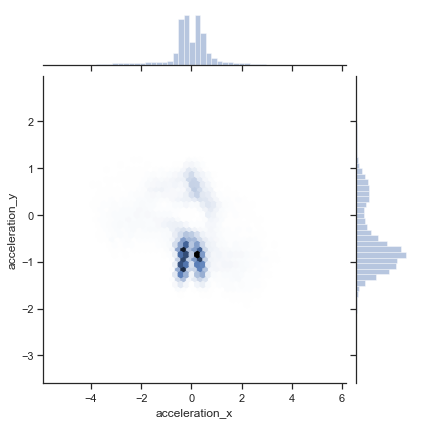

In [63]:
# Для всех данных
sns.jointplot(x='acceleration_x', y='acceleration_y', data=data, kind="hex")

# Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "activity"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [64]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


## Визаулизации коррелиации
Построим матрицу коореляции по трем коэффециентам

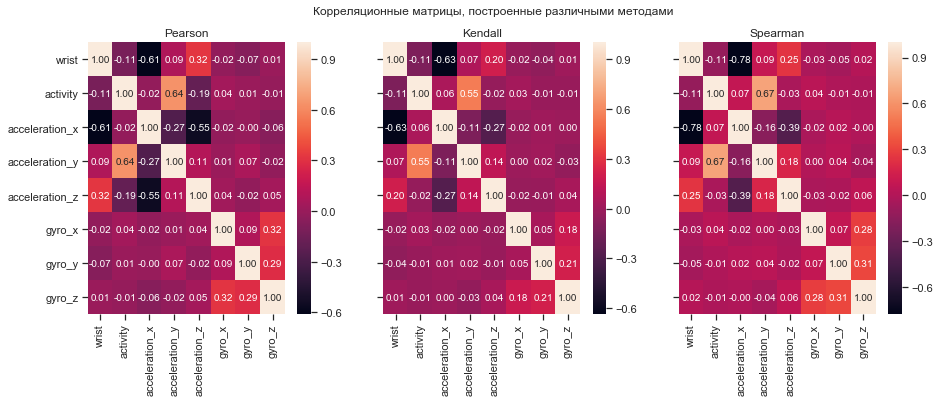

In [66]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Можно заметить, что наиболее коорелирующием признком (показатель в районе 0,6) является значения акселерометра по оси Y. Коореляция остальных признаков с нашем целевым признаком близка к 0. Соотвественно имеет смысл рассматривать модель по одному признаку acceleration_y

# Выводы
Лабораторная работа "Разведочный анализ данных. Исследование и визуализация данных" ознакомила с методами анализа и визуализации данных. Результаты лабораторной работы будут использоваться в последующих исследованиях типов активности пользователей технических средств реабилитации.